In [29]:
import numpy as np
import pandas as pd
import scipy.stats as st

import json
import requests
import pycountry_convert as pc

import hvplot.pandas
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)
import plotly.express as px

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

# Import API key
from api_keys import geoapify_key

In [30]:
# Load the CSV file into a dataframe
happiness_data = pd.read_csv("./World_Happiness_Report_2005-2021.csv")

# Display the data
happiness_data.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440


In [31]:
# Create a function to find the continent from the country name
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

In [32]:
# Create a list from the country names in the data frame
countries = happiness_data["Country name"].to_list()
len(countries)

2089

In [33]:
# Complete a for loop to replace the values of country names that are not correct or not in the correct format for the pycountry import
for i in range(len(countries)):
  
    # replace Congo (Brazzaville) with Congo
    if "(Brazzaville)" in countries[i]:
        countries[i] = "Congo"
  
    # replace Congo (Kinshasa) with Democratic Republic of the Congo
    if "(Kinshasa)" in countries[i]:
        countries[i] = "Democratic Republic of the Congo"
        
     # replace Hong Kong S.A.R. of China with Hong Kong
    if "S.A.R. of China" in countries[i]:
        countries[i] = "Hong Kong"   

     # replace Kosovo with Serbia
    if "Kosovo" in countries[i]:
        countries[i] = "Serbia"
        
     # replace North Cyprus with Cyprus
    if "North Cyprus" in countries[i]:
        countries[i] = "Cyprus"
        
     # replace Palestinian Territories with Palestine
    if "Palestinian Territories" in countries[i]:
        countries[i] = "Palestine"        

    # replace Somaliland region with Somalia
    if "Somaliland region" in countries[i]:
        countries[i] = "Somalia"   

    # replace Taiwan Province of China with Taiwan
    if "Taiwan Province of China" in countries[i]:
        countries[i] = "Taiwan"    

In [34]:
# Create a list to store continents
continents = []

In [35]:
# Complete a for loop through the list of countries and append the continent to the continents list using the function created earlier
for country in countries:
    continents.append(country_to_continent(country))

In [36]:
# Add the listed continents into the data frame continents columns
happiness_data["Continent"] = continents

# Display the data
happiness_data.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Continent
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072,Asia
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545,Asia
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357,Asia
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386,Asia
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440,Asia


In [37]:
# Drop the year column from the dataframe as it is taking an average and is useless
happiness_noyear = happiness_data.copy()

happiness_noyear.drop(columns="Year", inplace=True)

In [38]:
# Create a new dataframe with the data grouped by Continent, taking the mean/average of each column
happiness_data_continents = happiness_noyear.groupby(["Continent"]).mean()
happiness_continents = happiness_data_continents.reset_index()

happiness_continents.head()

,Continent,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Africa,4.385475,8.139021,0.711301,54.733665,0.691882,-0.025132,0.783417,0.637169,0.283340,0.555120
1,Asia,5.290222,9.395772,0.788602,64.096098,0.744466,0.032459,0.748525,0.605706,0.274532,0.563253
2,Europe,6.175831,10.323851,0.891104,68.311598,0.758749,-0.019420,0.722330,0.641121,0.249129,0.402696
3,North America,6.173773,9.511965,0.848895,64.192186,0.798731,0.035310,0.745026,0.764812,0.268871,0.413978
4,Oceania,7.284697,10.680011,0.949046,70.222333,0.921650,0.259774,0.341602,0.762443,0.207627,0.553125


In [39]:
# Describe the dataframe
happiness_continents.describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,5.889397,9.584721,0.842567,64.634313,0.782205,0.036949,0.688033,0.694729,0.264673,0.478479
std,0.974611,0.882400,0.083002,5.401237,0.077292,0.115202,0.171494,0.074165,0.033312,0.086844
min,4.385475,8.139021,0.711301,54.733665,0.691882,-0.061297,0.341602,0.605706,0.207627,0.382702
25%,5.474263,9.411256,0.803676,64.120120,0.748037,-0.023704,0.728004,0.638157,0.254065,0.405516
50%,6.100079,9.484836,0.857673,65.221093,0.768252,0.006520,0.746776,0.699122,0.271701,0.483552
75%,6.175317,10.120879,0.884941,67.796199,0.793487,0.034597,0.774694,0.761114,0.281138,0.554621
max,7.284697,10.680011,0.949046,70.222333,0.921650,0.259774,0.787300,0.764812,0.304539,0.563253


In [40]:
# Sort the dataframe by the Life Ladder scores so the continents will display in descending order
happiness_continents_laddersorted = happiness_continents.sort_values(by=["Life Ladder"], ascending=False) 

happiness_continents_laddersorted

,Continent,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
4,Oceania,7.284697,10.680011,0.949046,70.222333,0.921650,0.259774,0.341602,0.762443,0.207627,0.553125
2,Europe,6.175831,10.323851,0.891104,68.311598,0.758749,-0.019420,0.722330,0.641121,0.249129,0.402696
3,North America,6.173773,9.511965,0.848895,64.192186,0.798731,0.035310,0.745026,0.764812,0.268871,0.413978
5,South America,6.026385,9.457708,0.866451,66.250000,0.777754,-0.061297,0.787300,0.757124,0.304539,0.382702
1,Asia,5.290222,9.395772,0.788602,64.096098,0.744466,0.032459,0.748525,0.605706,0.274532,0.563253
0,Africa,4.385475,8.139021,0.711301,54.733665,0.691882,-0.025132,0.783417,0.637169,0.283340,0.555120


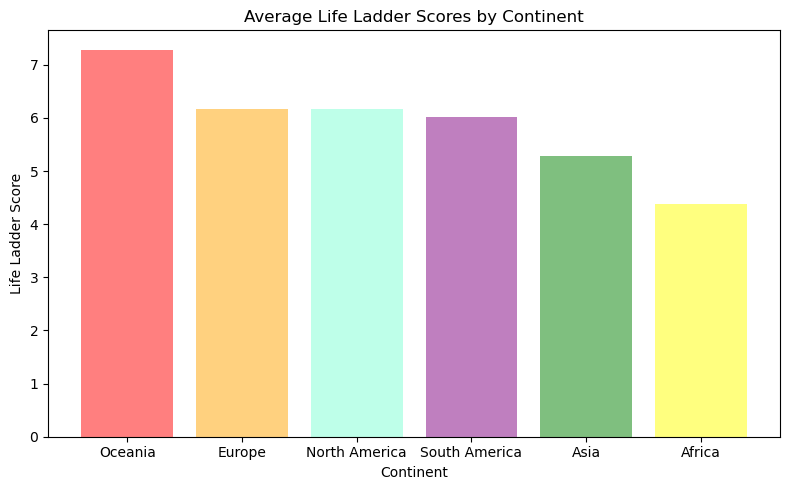

In [41]:
# Generate a bar plot showing the average Life Ladder score for each continent
continents_list = happiness_continents_laddersorted["Continent"].values.tolist()
life_ladder_scores = happiness_continents_laddersorted["Life Ladder"].values.tolist()

colours = ["red", "orange", "aquamarine", "purple", "green", "yellow"]

# Set x axis and tick locations
x_axis = np.arange(len(continents_list))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(8,5))
plt.bar(x_axis, life_ladder_scores, color=colours, alpha=0.5, align="center")
plt.xticks(tick_locations, continents_list)

# Set a Title and labels
plt.title("Average Life Ladder Scores by Continent")
plt.xlabel("Continent")
plt.ylabel("Life Ladder Score")

# Save the graph and show the grap
plt.tight_layout()
plt.savefig("Life_ladder_scores_by_continent.jpg")
plt.show()

In [42]:
# Sort the dataframe by the Log GDP per capita so the continents will display in descending order
happiness_continents_GDPsorted = happiness_continents.sort_values(by=["Log GDP per capita"], ascending=False) 

happiness_continents_GDPsorted

,Continent,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
4,Oceania,7.284697,10.680011,0.949046,70.222333,0.921650,0.259774,0.341602,0.762443,0.207627,0.553125
2,Europe,6.175831,10.323851,0.891104,68.311598,0.758749,-0.019420,0.722330,0.641121,0.249129,0.402696
3,North America,6.173773,9.511965,0.848895,64.192186,0.798731,0.035310,0.745026,0.764812,0.268871,0.413978
5,South America,6.026385,9.457708,0.866451,66.250000,0.777754,-0.061297,0.787300,0.757124,0.304539,0.382702
1,Asia,5.290222,9.395772,0.788602,64.096098,0.744466,0.032459,0.748525,0.605706,0.274532,0.563253
0,Africa,4.385475,8.139021,0.711301,54.733665,0.691882,-0.025132,0.783417,0.637169,0.283340,0.555120


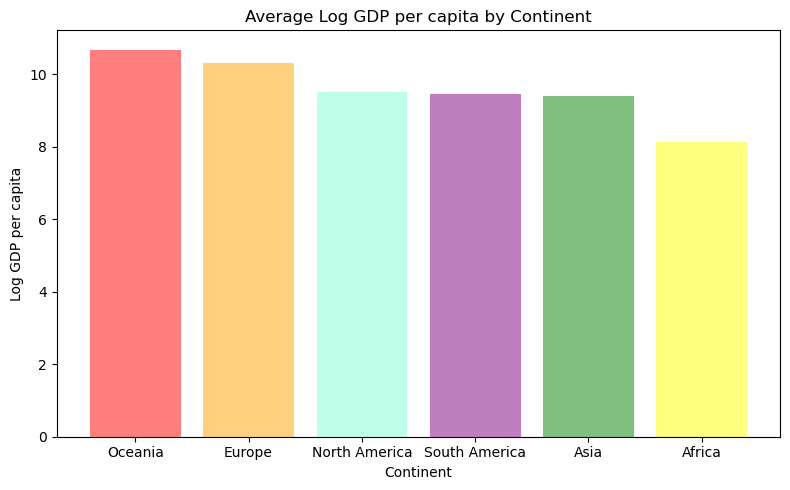

In [43]:
# Generate a bar plot showing the average Life Ladder score for each continent
continents_list = happiness_continents_GDPsorted["Continent"].values.tolist()
life_ladder_scores = happiness_continents_GDPsorted["Log GDP per capita"].values.tolist()

colours = ["red", "orange", "aquamarine", "purple", "green", "yellow"]

# Set x axis and tick locations
x_axis = np.arange(len(continents_list))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(8,5))
plt.bar(x_axis, life_ladder_scores, color=colours, alpha=0.5, align="center")
plt.xticks(tick_locations, continents_list)

# Set a Title and labels
plt.title("Average Log GDP per capita by Continent")
plt.xlabel("Continent")
plt.ylabel("Log GDP per capita")

# Save the graph and show the grap
plt.tight_layout()
plt.savefig("Log_GDP_percapita_by_continent.jpg")
plt.show()

In [14]:
# Copy the dataframe and then group the copy by Country name, taking the mean/average of each column per country
countries_happiness_df = happiness_data.copy()

countries_happiness_df = happiness_noyear.groupby(["Country name"]).mean().reset_index()
countries_happiness_df.head()

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,3.505506,7.583020,0.504086,52.353846,0.508496,0.075328,0.851207,0.450821,0.348225,0.382015
1,Albania,5.036288,9.378583,0.715285,68.457500,0.674589,-0.073345,0.871272,0.558089,0.296007,0.407852
2,Algeria,5.377251,9.334042,0.814826,66.080000,0.530804,-0.138656,0.697673,0.535673,0.267095,NaN
3,Angola,4.420299,8.989725,0.737973,52.150001,0.455957,-0.088896,0.867018,0.625734,0.351173,0.397389
4,Argentina,6.285048,10.031485,0.903041,66.628125,0.771455,-0.152174,0.840388,0.739983,0.287840,0.381224


In [15]:
# Check the general information in the dataframe
countries_happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country name                       166 non-null    object 
 1   Life Ladder                        166 non-null    float64
 2   Log GDP per capita                 162 non-null    float64
 3   Social support                     165 non-null    float64
 4   Healthy life expectancy at birth   162 non-null    float64
 5   Freedom to make life choices       166 non-null    float64
 6   Generosity                         162 non-null    float64
 7   Perceptions of corruption          161 non-null    float64
 8   Positive affect                    164 non-null    float64
 9   Negative affect                    165 non-null    float64
 10  Confidence in national government  155 non-null    float64
dtypes: float64(10), object(1)
memory usage: 14.4+ KB


In [16]:
# Define the data for the Life Ladder map
lifeladder_data = dict(
        type = 'choropleth',
        colorscale = 'RdBu',
        locations = countries_happiness_df['Country name'],
        locationmode = "country names",
        z = countries_happiness_df['Life Ladder'],
        text = countries_happiness_df['Country name'],
        colorbar = {'title' : 'Life Ladder'}
      )

In [17]:
# Plot the Life Ladder map
lifeladder_map = go.Figure(data = [lifeladder_data],layout = {      
      'geo':{
          'scope':'world', 
      }  
    })
iplot(lifeladder_map,validate=False)

In [18]:
# Save the Life Ladder map as an image file
lifeladder_map.write_image("Average_life_ladder_by_country.jpg")

In [19]:
# Define the data for the Log GDP map
GDP_data = dict(
        type = 'choropleth',
        colorscale = 'RdBu',
        locations = countries_happiness_df['Country name'],
        locationmode = "country names",
        z = countries_happiness_df['Log GDP per capita'],
        text = countries_happiness_df['Country name'],
        colorbar = {'title' : 'Log GDP per capita'}
      )

In [20]:
# Plot the Log GDP map
GDP_map = go.Figure(data = [GDP_data], layout = {      
      'geo':{
          'scope':'world', 
      }  
    })
iplot(GDP_map,validate=False)

In [21]:
# Save the Log GDP map as an image file
GDP_map.write_image("GDP_by_country.jpg")